<a href="https://colab.research.google.com/github/russellelliott/PythonChess/blob/main/Chess_Variant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=JHN22fL4LVw

Here are the rules:
"Chess, but every move you make move you make must share the same letter or number with the previous move"

In [1]:
pip install CairoSVG

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 990 kB/s 
     |████████████████████████████████| 88 kB 2.7 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=295dfd2722f124c2a1aa15461a38a38acfdbaa0c0dc83b7587a6f3ede72fe056
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


Functions for movement and getting game status

In [8]:
import chess
import chess.svg
from cairosvg import svg2png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#display the board as a png on matplotlib
def displayBoard(board):
    svg = chess.svg.board(board, size=350) #make the svg
    svg2png(bytestring=svg,write_to='output.png') #convert to png
    img = mpimg.imread('output.png')
    imgplot = plt.imshow(img)
    plt.show() #show the png

#function to check whose turn it is
def getTurn(board):
    #True = white, False = black
    if(board.turn):
        return("white")
    return("black")

#function to check the status of the game
def getStatus(board):
    status = "" #default status
    #Verifying check
    if(board.is_check()):
        status = "check"

    #Verifying checkmate
    if(board.is_checkmate()):
        status = "checkmate"

    #Verifying stalemate
    if(board.is_stalemate()):
        status = "stalemate"
    
    return status

#function that allows a human player to make a move
def human(board, moveInput):
    #displayBoard(board) #display the board after every turn
    #moveInput = input("make a legal move: ")
    if moveInput=="":
        print("need to input valid move")
        return board
    move = chess.Move.from_uci(moveInput) #make the move
    if move in board.legal_moves: #if the move is legal
        board.push(move) #push the move
    elif chess.Move.from_uci(moveInput + "q") in board.legal_moves: #check if promotion
        moveInput+='q' #autopromote to queen
        #moveInput += input("Which piece you want to promote the pawn to? [q,r,b,n]: ") #promotion query
        move = chess.Move.from_uci(moveInput) #make the move
        board.push(move) #push the move
    else:
        print("invalid move. try again")
    return board

#function to check whose turn it is
def getTurn(board):
    #True = white, False = black
    if(board.turn):
        return("white")
    return("black")

The rules are the same as chess except for this rule about movement:

After a player makes a move in which a PIECE ends on the ENDSQUARE, the move of the other player must satisfy at least one requirement:
- The piece must start on the same row the previous piece landed on
- The piece must start on the came column the previous piece landed on
- The piece must be of the same type as the previous piece



In [48]:
def getMoveOptions(board):
    prevMove = board.legal_moves #initally, set the move options to all of them
    #first, get the most recent move (if applicable)
    try:
        prevMove = board.peek() #get the previous move
        print("previous move: ", prevMove) 
    except:
        print("no previous") #no previous moves; player can make any move
        
    return prevMove
    

Main Code

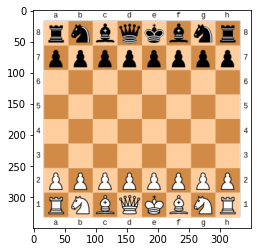

no previous
move options:  <LegalMoveGenerator at 0x7faccb1da5d0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>
make a move: a2a4


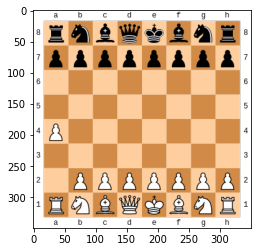

previous move:  a2a4
move options:  a2a4
make a move: b7c6
invalid move. try again


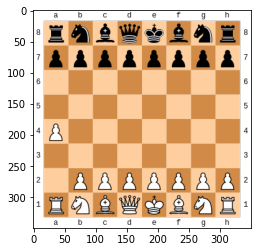

previous move:  a2a4
move options:  a2a4
make a move: b8c6


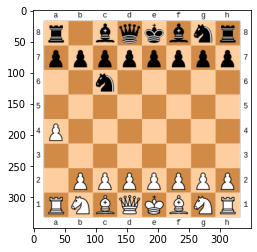

previous move:  b8c6
move options:  b8c6
make a move: exit


ValueError: ignored

In [49]:
board = chess.Board()
#print(board.unicode())
while getStatus(board) not in ['checkmate', 'stalemate']:
    displayBoard(board)
    moveOptions = getMoveOptions(board)
    print("move options: ", moveOptions)
    move = input("make a move: ")
    human(board, move)

    displayBoard(board)
    moveOptions = getMoveOptions(board)
    print("move options: ", moveOptions)
    move = input("make a move: ")
    human(board, move)